# Analysis of EDX file

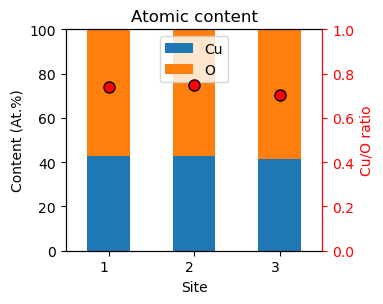

In [1]:
#!/usr/bin/env python
# coding: utf-8

import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import shutil
from scipy.signal import savgol_filter
import math

from scipy.signal import find_peaks
from scipy.optimize import curve_fit

# Functions

def cm_to_inch(cm):
    inch=float(cm/2.54)
    return inch

def AgCl_to_RHE(V_AgCl,pH,ref):
    if ref == "Ag/AgCl":
        V_RHE=+0.197+V_AgCl+0.059*pH
        return V_RHE
    
# Read the content of the file

url_EDX = "https://raw.githubusercontent.com/FedeDat/SuPERCO2/main/data/24-10-30_CuO/characterization/EDX.csv"

data_EDX = pd.read_csv(url_EDX, usecols=lambda column: pd.notnull(column))
data_EDX.dropna(axis=1, how='all', inplace=True)

#Calculate ratio between metal and oxygen

data_EDX[''+str(data_EDX.columns[0])+'/'+str(data_EDX.columns[1])+'']=data_EDX[data_EDX.columns[0]]/data_EDX[data_EDX.columns[1]]

data_EDX.index=list(range(1, len(data_EDX)+1))

ax1 = data_EDX.iloc[:,:-1].plot(kind='bar', stacked=True, figsize=(cm_to_inch(10), cm_to_inch(8)))
plt.legend(loc='upper center')

ax2 = ax1.twinx()  # Create a second y-axis
ax2.plot(data_EDX.index-1, data_EDX[data_EDX.columns[-1]], linestyle='None', marker='o', markersize=8, markerfacecolor='red', markeredgecolor='black')

# Adding titles and labels
ax1.set_xticklabels(list(range(1, len(data_EDX)+1)), rotation=0, ha='right')

ax1.set_title('Atomic content')
ax1.set_xlabel('Site')
ax1.set_ylabel('Content (At.%)')

ax2.yaxis.label.set_color('red')  # Change the y-axis label color
ax2.spines['right'].set_color('red')  # Change the spine color to red
ax2.tick_params(axis='y', colors='red')  # Change the tick color to red

ax2.set_ylabel(''+str(data_EDX.columns[0])+'/'+str(data_EDX.columns[1])+' ratio')

ax1.set_ylim(0, 100)
ax2.set_ylim(0, 1)

# Display the plot
plt.tight_layout()  # Adjust layout
plt.show()

plt.savefig('EDX.png', format='png', dpi=300, transparent=True, bbox_inches='tight')

#plt.close()

data_EDX.to_csv('EDX_analysed.csv', index=False)